In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.collections import LineCollection

rng = np.random.default_rng(seed=0)

In [2]:
cos_list = [np.cos(x * 2 * np.pi / 5) for x in np.arange(5)]
sin_list = [np.sin(x * 2 * np.pi / 5) for x in np.arange(5)]

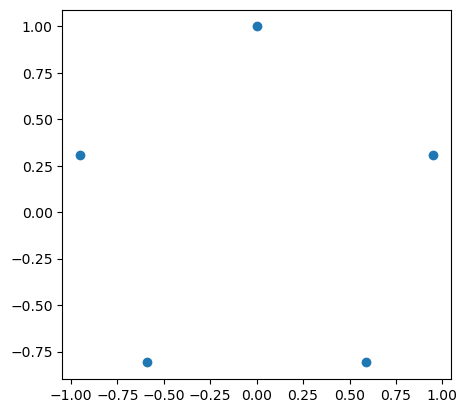

In [3]:
fig, ax = plt.subplots()
ax.scatter(sin_list, cos_list)
ax.set_aspect('equal')
plt.show()

In [4]:
offsets = rng.uniform(size=5)
offsets = offsets / np.sum(offsets)

offsets = np.array([.2, .2, .2, .2, .2])

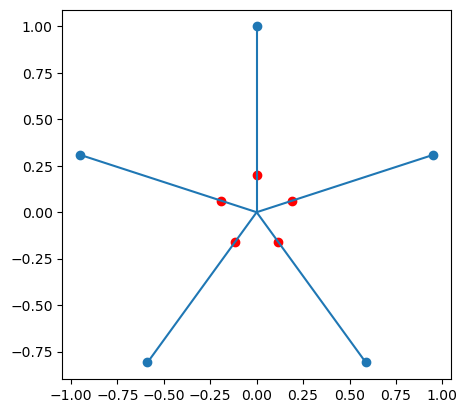

In [5]:
fig, ax = plt.subplots()
ax.scatter(sin_list, cos_list)

lines = [[(0, 0), (s, c)] for s, c in zip(sin_list, cos_list)]
ax.add_collection(LineCollection(lines))

ax.scatter(sin_list * offsets, cos_list * offsets, color='red')
ax.set_aspect('equal')
plt.show()

In [6]:
slopes = [-(s/c) for c,s in zip(cos_list, sin_list)]
slopes

[-0.0,
 -3.077683537175253,
 0.7265425280053611,
 -0.7265425280053608,
 3.077683537175256]

In [7]:
lines

[[(0, 0), (0.0, 1.0)],
 [(0, 0), (0.9510565162951535, 0.30901699437494745)],
 [(0, 0), (0.5877852522924732, -0.8090169943749473)],
 [(0, 0), (-0.587785252292473, -0.8090169943749475)],
 [(0, 0), (-0.9510565162951536, 0.30901699437494723)]]

In [8]:
def determine_y(x, px, py, slope=None, default=0):
    if slope is None:
        return default
    else: 
        return slope*(x - px) + py

lines = []
for s, c, o, slope in zip(sin_list, cos_list, offsets, slopes):
    p1 = (-5, determine_y(-5, s*o, c*o, slope))
    p2 = (5, determine_y(5, s*o, c*o, slope))
    lines.append([p1, p2])

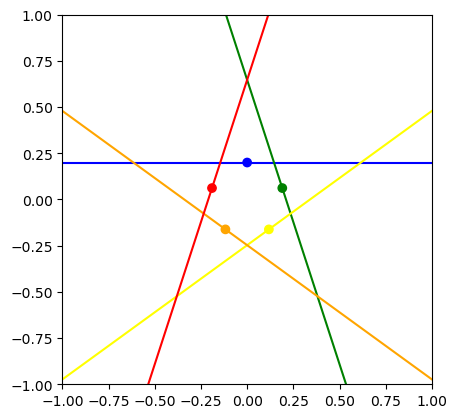

In [9]:
colors = ["blue", "green", "yellow", "orange", "red"]

fig, ax = plt.subplots()
ax.add_collection(LineCollection(lines, colors = colors))

ax.scatter(sin_list * offsets, cos_list * offsets, color=colors)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect('equal')
plt.show()

In [10]:
lines = []
for x in np.arange(-3, 3):
    for s, c, o, slope in zip(sin_list, cos_list, offsets, slopes):
        p1 = (-5, determine_y(-5, s*(o+x), c*(o+x), slope))
        p2 = (5, determine_y(5, s*(o+x), c*(o+x), slope))
        lines.append([p1, p2])

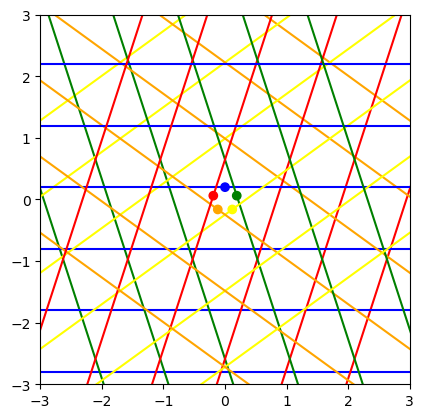

In [11]:
fig, ax = plt.subplots()
ax.add_collection(LineCollection(lines, colors = colors))

ax.scatter(sin_list * offsets, cos_list * offsets, color=colors)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_aspect('equal')
plt.show()

In [36]:
# Determine intersections
# This needs to be made into a class to handle /0 exceptions
def find_intersections(l0, l1):
    p = l0[0]
    r = (l0[1] - l0[0])

    q = l1[0]
    s = (l1[1] - l1[0])

    denom = (np.cross(r, s))
    if denom != 0:
        t = np.cross(q - p, s)/denom
        return p + t*r
    else:
        return False
    

In [37]:
find_intersections([np.asarray(lines[2][0]), np.asarray(lines[2][1])], [np.asarray(lines[5][0]), np.asarray(lines[5][1])])

IndexError: list index out of range

In [38]:
from itertools import product
intersections = [find_intersections([np.asarray(pair[0][0]), np.asarray(pair[0][1])],
                                    [np.asarray(pair[1][0]), np.asarray(pair[1][1])]) 
                                    for pair in product(lines, lines)]
intersections = [i for i in intersections if i is not False]
intersections

[array([0.14530851, 0.2       ]),
 array([0.61553671, 0.2       ]),
 array([-0.61553671,  0.2       ]),
 array([-0.14530851,  0.2       ]),
 array([0.14530851, 0.2       ]),
 array([ 0.2351141, -0.0763932]),
 array([ 0.38042261, -0.5236068 ]),
 array([8.88178420e-16, 6.47213595e-01]),
 array([0.61553671, 0.2       ]),
 array([ 0.2351141, -0.0763932]),
 array([ 0.       , -0.2472136]),
 array([-0.38042261, -0.5236068 ]),
 array([-0.61553671,  0.2       ]),
 array([ 0.38042261, -0.5236068 ]),
 array([ 0.       , -0.2472136]),
 array([-0.2351141, -0.0763932]),
 array([-0.14530851,  0.2       ]),
 array([8.88178420e-16, 6.47213595e-01]),
 array([-0.38042261, -0.5236068 ]),
 array([-0.2351141, -0.0763932])]

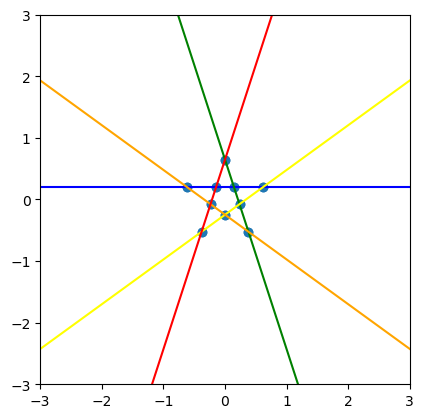

In [39]:
xs = [p[0] for p in intersections]
ys = [p[1] for p in intersections]

fig, ax = plt.subplots()

ax.add_collection(LineCollection(lines, colors = colors))

ax.scatter(xs, ys)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_aspect('equal')
plt.show()

334


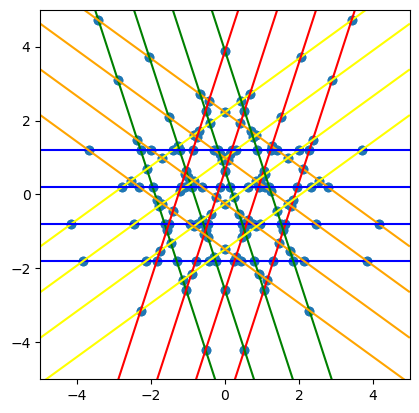

In [51]:
lines = []
for x in np.arange(-2, 2):
    for s, c, o, slope in zip(sin_list, cos_list, offsets, slopes):
        p1 = (-5, determine_y(-5, s*(o+x), c*(o+x), slope))
        p2 = (5, determine_y(5, s*(o+x), c*(o+x), slope))
        lines.append([p1, p2])

intersections = [find_intersections([np.asarray(pair[0][0]), np.asarray(pair[0][1])],
                                    [np.asarray(pair[1][0]), np.asarray(pair[1][1])]) 
                                    for pair in product(lines, lines)]
intersections = [i for i in intersections if i is not False]

print(len(intersections))

xs = [p[0] for p in intersections]
ys = [p[1] for p in intersections]

fig, ax = plt.subplots()

ax.add_collection(LineCollection(lines, colors = colors))

ax.scatter(xs, ys)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_aspect('equal')
plt.show()


[ 0.        -0.2472136]


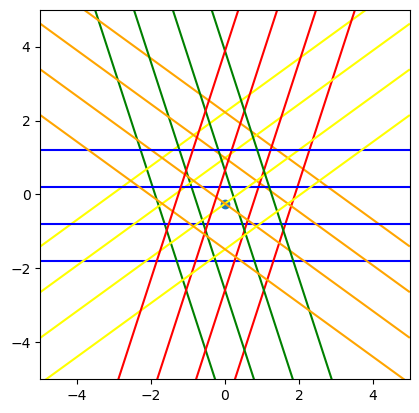

In [55]:
intersection = intersections[0]
current_distance = 5
for i in intersections:
     distance_to_center = np.square(i[0]) + np.square(i[1])
     if distance_to_center < current_distance:
          current_distance = distance_to_center
          intersection = i
print(intersection)

fig, ax = plt.subplots()

ax.add_collection(LineCollection(lines, colors = colors))

ax.scatter(intersection[0], intersection[1])
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_aspect('equal')
plt.show()
    

In [62]:
k = []
for c, s, o in zip(cos_list, sin_list, offsets):
    k.append(np.ceil(c * intersection[0] + s * intersection[1] + o))
print(k)

[1.0, -0.0, 1.0, 1.0, 1.0]


In [57]:
need to keep track of which lines go with which intersection
then flip between +0 and +1 for them to get the four coordinates
    
nows the time to make this into classes

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [63]:
intersections

[array([-1.30777655, -1.8       ]),
 array([-5.53983037, -1.8       ]),
 array([ 5.53983037, -1.8       ]),
 array([ 1.30777655, -1.8       ]),
 array([-0.25631433, -1.8       ]),
 array([-3.83852875, -1.8       ]),
 array([ 3.83852875, -1.8       ]),
 array([ 0.25631433, -1.8       ]),
 array([ 0.7951479, -1.8      ]),
 array([-2.13722713, -1.8       ]),
 array([ 2.13722713, -1.8       ]),
 array([-0.7951479, -1.8      ]),
 array([ 1.84661012, -1.8       ]),
 array([-0.43592552, -1.8       ]),
 array([ 0.43592552, -1.8       ]),
 array([-1.84661012, -1.8       ]),
 array([-1.30777655, -1.8       ]),
 array([-2.11602691,  0.68753882]),
 array([-3.42380346,  4.71246118]),
 array([ 8.88178420e-16, -5.82492236e+00]),
 array([-1.63269625, -0.8       ]),
 array([ 5.69295099e+15, -1.75211015e+16]),
 array([-1.79110721, -0.31246118]),
 array([-2.89807235,  3.09442719]),
 array([-0.52573111, -4.20688837]),
 array([-1.95761594,  0.2       ]),
 array([ 1.13859020e+16, -3.50422031e+16]),
 array([

[[(-5, -1.8), (5, -1.8)],
 [(-5, 9.563495326376644), (5, -21.213340045375883)],
 [(-5, -1.4077902805271838), (5, 5.857634999526427)],
 [(-5, 5.857634999526425), (5, -1.4077902805271827)],
 [(-5, -21.213340045375904), (5, 9.563495326376653)],
 [(-5, -0.8), (5, -0.8)],
 [(-5, 12.799563303876434), (5, -17.977272067876097)],
 [(-5, -2.643858258026974), (5, 4.621567022026637)],
 [(-5, 4.621567022026635), (5, -2.643858258026972)],
 [(-5, -17.97727206787611), (5, 12.799563303876447)],
 [(-5, 0.2), (5, 0.2)],
 [(-5, 16.035631281376226), (5, -14.741204090376307)],
 [(-5, -3.8799262355267636), (5, 3.3854990445268474)],
 [(-5, 3.385499044526846), (5, -3.879926235526762)],
 [(-5, -14.74120409037632), (5, 16.03563128137624)],
 [(-5, 1.2), (5, 1.2)],
 [(-5, 19.27169925887601), (5, -11.505136112876517)],
 [(-5, -5.115994213026553), (5, 2.1494310670270576)],
 [(-5, 2.1494310670270567), (5, -5.115994213026552)],
 [(-5, -11.505136112876528), (5, 19.27169925887603)]]